# Houston, We Have an Optimization Problem
J. BENNETT, M. DAVIS, Z. MEYER, M. SHIELDS, L. TOLMAN

Animations also found at: https://www.qrcreator.com/p/3E421549/

# Abstract

In this project we attempt to solve an intricate optimal control problem. We want to understand the optimal path (in a two-dimensional world) from a spaceship back to the international space station in a given amount of time. In this scenario, "optimal" means minimizing fuel consumption, which can be accomplished by minimizing acceleration. We also make this problem more complex by adding in asteroids that the spaceship must avoid. This traditionally would require inequality constraints, but we will utilize soft constraints instead. We run our solution first without asteroids and then make the problem more complex. We also animate our results to better understand and visualize the optimal path.

# Introduction

Space travel has long fascinated humanity. In recent years, more and more space travel is occurring. Traveling in space presents many different and unique challenges. In our project, we attempt to better understand optimal paths for traveling in space. While we do simplify the problem in many ways (making it two dimensional, ignoring gravity, etc.) we still can learn a lot from optimal paths in our problem. We set up a problem where our spaceship is located at the origin in a two-dimensional world. We then try and find the optimal path back to the space station placed at $(1,1)$. In our most simplified model, we do not have any asteroids in the way. In space where there is no air resistance, once you are traveling a certain velocity you continue to travel at that velocity. This means we can minimize gas consumption by minimizing the acceleration in the $x$ and $y$ direction. This will give us our optimal path. In our first model, with no asteroids in the way, this should result in a straight path back to the space station.

After getting this model to work, we complicate our model by adding asteroids. To avoid an asteroid, we could use inequality constraints with KKT conditions. However, due to the complexities of KKT conditions in optimal control, we can also handle this constraint as a soft constraint. By constructing the constraint as just part of our cost functional, we keep a solution similar to that which would have been derived through KKT while remaining numerically stable $^{[1]}$. We took the latter approach of adding the constraint into the cost functional. This essentially adds a cost to our functional when the spaceship is too close to the asteroid. We want this cost to vanish quickly when the spaceship is away from the asteroid, so it does not take a very suboptimal path. We also do not want this cost to vanish so quickly that the spaceship gets arbitrarily close to the asteroid. By adding this constraint to our cost functional, when we minimize our cost functional, we will minimize gas consumption and avoid the asteroids. After our first model, we will add an asteroid and find the optimal path. Then we will continue to add asteroids to see how our path changes. Then, we will make the asteroids move instead of being stationary. In our final attempt we will make the problem three dimension. 

In all of our models with stationary asteroids and in a two dimensional world, we use the following cost functional and state space.


$$J[u] = \int_0^{t_f} \left [\frac{1}{2}u_{x}(t)^2 + \frac{1}{2}u_{y}(t)^2 + \sum_{i = 1}^n \frac{W_i}{\left (\frac{\left(x(t) - c_x\right)^2}{r_i} + \frac{\left(y(t) - c_y\right)^2}{r_i} \right)^{20} + 1}\right ] dt$$

$$ S = \begin{bmatrix}  x &  y & \dot x & \dot y  \end{bmatrix}  ^T $$

$$ \dot S = \begin{bmatrix} \dot x & \dot y & u_x & u_y  \end{bmatrix}  ^T $$

We use the cost functional defined above. In this cost functional $u_x$ and $u_y$ represent acceleration in the $x$ and $y$ direction. In the summation, $n$ represent the number of asteroids. So, if we do not have any asteroids, the summation does not exist. In the summation part of the cost functional, $W_i$ is the weight of the ith asteroid (the cost of getting too close or hitting the asteroid) and $c_{x_i}$, $c_{y_i}$, and $r_i$ define the center and radius of the ith asteroid. With our cost functional and state space defined we can use Pontryagin’s Maximum Principle (PMP) to find our costate evolution equations. 

$$ P = \begin{bmatrix}  P_0 &  P_1 & P_2 & P_3  \end{bmatrix}  ^T $$

$$ \dot P = \begin{bmatrix}  C_x &  C_y & -P_0 & -P_1  \end{bmatrix}  ^T$$

$C_x$ and $C_y$ are the derivative of the cost of the asteroid with respect $x$ and $y$. Because, according to PMP, $\dot P_i$ = $-\frac{DH}{Dx_i}$ where $x_i$ is an element of the state space. Then, $C_x$ and $C_y$ are defined as follows:


$$ \begin{align*}
\dot P_0 = C_x = \frac{-DH}{Dx} = \sum_{i=1}^n\frac{-40W_i(x - c_{x_i})\left(\frac{(x - c_{x_i})^2}{r_i} + \frac{(y - c_{y_i})^2}{r_i}\right)^{19}}{r_i\left(\left(\frac{(x - c_{x_i})^2}{r_i} + \frac{(y - c_{y_i})^2}{r_i}\right)^{20} + 1\right)^2}
   \end{align*}$$
   
and 

$$ \begin{align*}
\dot P_1 = C_y = \frac{-DH}{Dy} = \sum_{i=1}^n\frac{-40W_i(y - c_{y_i})\left(\frac{(x - c_{x_i})^2}{r_i} + \frac{(y - c_{y_i})^2}{r_i}\right)^{19}}{r_i\left(\left(\frac{(x - c_{x_i})^2}{r_i} + \frac{(y - c_{y_i})^2}{r_i}\right)^{20} + 1\right)^2}
   \end{align*}$$

Now we have everything we need to solve our optimization problem besides our boundary conditions. Based on the setup of our problem we use the following boundary conditions.

$$ \begin{align*}
        x(0) &= 0 & x(t_f) &= 1\\
        y(0) &= 0 & y(t_f) &= 1\\
        \dot x(0) &= v_x & \dot x(t_f) &= 0\\
        \dot y(0) &= v_y & \dot y(t_f) &= 0\\
    \end{align*} $$

This ensures that our spaceship is starting at the origin and travels to the space station. We are also assuming that our spaceship could have been moving with initial velocities of $v_x$ and $v_y$ in the $x$ and $y$ direction before we begin our optimization problem. We also want our spaceship to stop moving once it arrives at the space station.


This gives us everything we need to solve for our optimal path. We will showcase several different situations and amounts of asteroids in the following models. When we adjust the asteroids so that they are moving, we change the cost functional to the following form:

$$J[u] = \int_0^{t_f} \left [\frac{1}{2}u_{x}(t)^2 + \frac{1}{2}u_{y}(t)^2 + \sum_{i = 1}^n \frac{W_i}{\left (\frac{\left(x(t) - c_x(t)\right)^2}{r_i} + \frac{\left(y(t) - c_y(t)\right)^2}{r_i} \right)^{20} + 1}\right ] dt$$

The only difference in this cost functional is that now the asteroids center is a function of time. 

For our last model in three dimensions we had to adjust our set up. We needed to increase the dimensionality of our model, including the states and costates, from 8 to 12.

The cost functional and state space are now the following:

$$J[u] = \int_0^{t_f} \left [\frac{1}{2}u_{x}(t)^2 + \frac{1}{2}u_{y}(t)^2 + \frac{1}{2}u_{z}(t)^2+ \sum_{i = 1}^n \frac{W_i}{\left (\frac{\left(x(t) - c_x\right)^2}{r_i} + \frac{\left(y(t) - c_y\right)^2}{r_i} + \frac{\left(z(t) - c_z\right)^2}{r_i}\right)^{20} + 1}\right ] dt$$

$$ S = \begin{bmatrix}  x &  y & z & \dot x & \dot y & \dot z \end{bmatrix}  ^T $$

$$ \dot S = \begin{bmatrix} \dot x & \dot y & \dot z & u_x & u_y & u_z \end{bmatrix}  ^T $$

The acceleration in the z direction can now be defined as $u_z$. The z position of the center of the asteroid is $c_z$. With our updated state space and cost functional, we can now use PMP to derive the evolution equations of our costate from $H = p \cdot S - L$. They are defined below:

$$ P = \begin{bmatrix}  P_0 &  P_1 & P_2 & P_3 & P_4 & P_5  \end{bmatrix}  ^T $$

$$ \dot P = \begin{bmatrix}  C_x &  C_y & C_z & -P_0 & -P_1 & -P_2  \end{bmatrix}  ^T$$

$C_x$, $C_y$ and $C_z$ are similar to the two dimensional case. 

$$ \begin{align*}
\dot P_0 = C_x = \frac{-DH}{Dx} = \sum_{i=1}^n\frac{-40W_i(x - c_{x_i})\left(\frac{(x - c_{x_i})^2}{r_i} + \frac{(y - c_{y_i})^2}{r_i}\right)^{19}}{r_i\left(\left(\frac{(x - c_{x_i})^2}{r_i} + \frac{(y - c_{y_i})^2}{r_i}\right)^{20} + 1\right)^2}
   \end{align*}$$
   

$$ \begin{align*}
\dot P_1 = C_y = \frac{-DH}{Dy} = \sum_{i=1}^n\frac{-40W_i(y - c_{y_i})\left(\frac{(x - c_{x_i})^2}{r_i} + \frac{(y - c_{y_i})^2}{r_i} + \frac{(z - c_{z_i})^2}{r_i}\right)^{19}}{r_i\left(\left(\frac{(x - c_{x_i})^2}{r_i} + \frac{(y - c_{y_i})^2}{r_i}+ \frac{(z - c_{z_i})^2}{r_i}\right)^{20} + 1\right)^2}
   \end{align*}$$
   
$$ \begin{align*}
\dot P_2 = C_z = \frac{-DH}{Dz} = \sum_{i=1}^n\frac{-40W_i(z - c_{y_i})\left(\frac{(x - c_{x_i})^2}{r_i} + \frac{(y - c_{y_i})^2}{r_i} + \frac{(z - c_{z_i})^2}{r_i}\right)^{19}}{r_i\left(\left(\frac{(x - c_{x_i})^2}{r_i} + \frac{(y - c_{y_i})^2}{r_i}+ \frac{(z - c_{z_i})^2}{r_i}\right)^{20} + 1\right)^2}
   \end{align*}$$

Assuming a fixed final time of one, our new boundary conditions are defined as follows:

$$ \begin{align*}
        x(0) &= 0 & x(t_f) &= 1\\
        y(0) &= 0 & y(t_f) &= 1\\
        z(0) &= 0 & z(t_f) &= 1\\
        \dot x(0) &= v_x & \dot x(t_f) &= 0\\
        \dot y(0) &= v_y & \dot y(t_f) &= 0\\
        \dot z(0) &= v_z & \dot z(t_f) &= 0\\
    \end{align*} $$

These are the exact same boundary conditions as previously mentioned but accounting for the third dimension.

# Models

Before showing code for each model we will showcase code used in many of the models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_bvp
import matplotlib.image as mpimg
from scipy.ndimage import rotate

We will use the above imports and packages in our models while solving for the optimal path of the spaceship.

In [2]:
def obstacle(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    Define an area that will represent an asteroid
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    x derivative of the asteroid

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    y derivative of the asteroid

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2
    
    return numer / denom

The functions above will be used for models 1-7 to define our stationary asteroid obstacles.

In [3]:
def new_obstacle(x,y,t,xspeed,yspeed,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    Define an area that will represent an asteroid with a moving center
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''
    c = (xspeed*t+c[0],yspeed*t+c[1])
    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**2 + 1

    return W1 / ellipse

def new_obstaclexy(x,y,t,xspeed,yspeed,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    Extract the x and y values for the new center of the moving asteroid
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''
    c = (xspeed*t+c[0],yspeed*t+c[1])

    return c

def new_obstacle_dx(x,y,t,xspeed,yspeed,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    x derivative of the asteroid with a moving center

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''
    c = (xspeed*t+c[0],yspeed*t+c[1])
    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def new_obstacle_dy(x,y,t,xspeed,yspeed, W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    y derivative of the asteroid with a moving center

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''
    c = (xspeed*t+c[0],yspeed*t+c[1])
    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

The functions above will be used for model 8 to define our moving asteroid obstacles.

In [4]:
# Read in rocket image
filepath = "Untitled_Artwork.png"
img = mpimg.imread(filepath)

# Rotate rocket image based on velocity
def rotate_rocket(xv,yv):
    angle = np.degrees(np.arctan2(-xv,yv))
    rotated_img = rotate(img, angle, reshape=False)
    rotated_img = np.clip(rotated_img, 0, 1)
    return rotated_img

The above function and code will be used in our animations to import an image of a rocket. The rocket will also rotate as it turns to make the animation look more realistic.

Note to the reader: The following animations take a considerable amount of time to generate, so we suggest only running the first cell of each model to generate a plot of the optimal path. The animations themselves can take several minutes to create each frame in high enough quality. Feel free to run the cells that plot the path and change the parameters as desired.

### Model 1

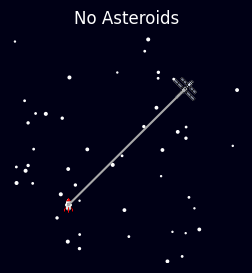

In [5]:
#set initial conditions
t0 = 0
tf = 1

def ode(t, y_val): #define the ode system
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    zeros = np.zeros_like(x)

    return np.array([xp, yp, p2, p3, zeros, zeros, -p0, -p1])

def bc(ya,yb):
# ya are the initial values
# yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3],yb[0]-1,yb[1]-1,yb[2],yb[3]])

#set the intial conditions and yo
t_steps = 200
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y0 = np.ones((8,t_steps))

# Solve the system.
sol = solve_bvp(ode, bc, t, y0)

#plot the solutions and label everything
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3,3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#plot the space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the dimensions for the rocket
ROCKET_SIZE = .14
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# Plot initial position of the rocket
ax.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

ax.plot(sol.y[0], sol.y[1],'darkgray')
ax.axis('off')
title_obj = plt.title('No Asteroids')
plt.setp(title_obj, color='w')
plt.show()

This shows the solution to the boundary problem.

In [6]:
# set the size of the rocket
ROCKET_SIZE = .14

plt.ioff()

#get data
path_length=len(sol.y[1])
ts = range(path_length+50)
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3, 3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

path=np.vstack((sol.y[0], sol.y[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)

#plot stars in the background
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#read in the image of the space station and place it
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the locations for the rocet
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# plot the trajectory
line, = plt.gca().plot([], [], "--", linewidth=3,)

# Plot initial position of the rocket
rocket = plt.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

# ax.legend()
def update(t):
    if t<50:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-50
    else:
        s=t-50
        p=t

    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    
    #update rocket
    rocket.set_data(rotate_rocket(sol.y[2][t],sol.y[3][t]))
    rocket.set_extent([sol.y[0][t] - ROCKET_SIZE, sol.y[0][t] + ROCKET_SIZE, sol.y[1][t] - ROCKET_SIZE, sol.y[1][t] + ROCKET_SIZE])
    
#save and show
ani = FuncAnimation(fig, update, frames=ts[:200][::10], interval=20)
ani.save('simple_example.mp4')


In order to check the effectiveness of our set up, we ran an animation with no asteroids. As expected, we see that the rocket flies in a straight path (which is clearly optimal if there are no obstacles to avoid). The rocket speeds up, before coming to a stop at the space station. Since it works in this simple case, we were now able to add asteroids blocking the rocket’s path.


<video src="simple_example.mp4" controls>

### Model 2

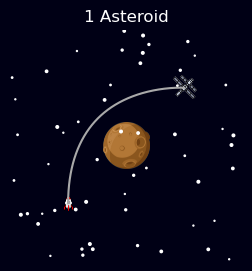

In [51]:
#set initial conditions
t0 = 0
tf = 1
W = 10
r = (.1,.1)

def ode(t, y_val): #define the ode system
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    new_p0 = obstacle_dx(x,y,W,r) #find the new p0 and p1
    new_p1 =  obstacle_dy(x,y,W,r)
    return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])

def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-3,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linspaces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)
Z = obstacle(X,Y,W,r) #find Z 
#set the initial guess
y0 = np.ones((8,t_steps))*3
# Solve the system.
sol = solve_bvp(ode, bc, t, y0, max_nodes=30000)

#plot the solutions and label everything
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3,3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
c = [1/2,1/2]
r = .2
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])

#plot the space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the dimensions for the rocket
ROCKET_SIZE = .14
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# Plot initial position of the rocket
ax.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

ax.plot(sol.y[0], sol.y[1],'darkgray')
ax.axis('off')
title_obj = plt.title('1 Asteroid')
plt.setp(title_obj, color='w')
plt.show()

This finds the solution to the boundary problem.

In [8]:
# plot the rocket
ROCKET_SIZE = .14

plt.ioff()

#get data
path_length=len(sol.y[1])
ts = range(path_length+50)
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3, 3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#get path
path=np.vstack((sol.y[0], sol.y[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)

#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
c = [1/2,1/2]
r = .2
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])

#read in the space station
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the location of the rocket
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# plot the trajectory
line, = plt.gca().plot([], [], "--", linewidth=3,)

# Plot initial position of the rocket
rocket = plt.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

# ax.legend()
def update(t):
    if t<50:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-50
    else:
        s=t-50
        p=t

    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])

    #update rocket
    rocket.set_data(rotate_rocket(sol.y[2][t],sol.y[3][t]))
    rocket.set_extent([sol.y[0][t] - ROCKET_SIZE, sol.y[0][t] + ROCKET_SIZE, sol.y[1][t] - ROCKET_SIZE, sol.y[1][t] + ROCKET_SIZE])

#save and show
ani = FuncAnimation(fig, update, frames=ts[:950][::10], interval=20)
ani.save('rocket1.mp4')

For our second attempt, we demonstrate the case of a single asteroid lying within the straight-line path to the space station. The rocket successfully avoids the obstacle and slows to a stop at the space station.

<video src="rocket1.mp4" controls>

### Model 3

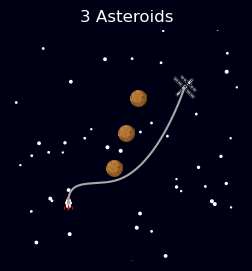

In [52]:
#set the initial conditions
t0 = 0
tf = 1
W = 15000
r = (.007,.007)

#notice we have multiple asteroids
c2 = (.6,.9)
c3 = (.4,.3)
c4 = (.5,.6)

def ode(t, y_val): #define the ode system
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    #get the new p0 and p1
    new_p0 = obstacle_dx(x,y,W,r,c4) + obstacle_dx(x,y,W,r,c2) + obstacle_dx(x,y,W,r,c3)
    new_p1 =  obstacle_dy(x,y,W,r,c4) + obstacle_dy(x,y,W,r,c2) + obstacle_dy(x,y,W,r,c3)
    return np.array([xp, yp, p2, p3, new_p0, new_p1, -p0, -p1])

def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linspaces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)
#find the obstacles
Z2 = obstacle(X,Y,W,r,c2)
Z3 = obstacle(X,Y,W,r,c3)
Z4 = obstacle(X,Y,W,r,c4)
# set the initial guess.
y0 = np.ones((8,t_steps))*3
# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3,3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
r = .07
ax.imshow(asteroid1, extent=[c4[0]-r, c4[0]+r, c4[1]-r, c4[1]+r])
r = .07
ax.imshow(asteroid1, extent=[c2[0]-r, c2[0]+r, c2[1]-r, c2[1]+r])
r = .07
ax.imshow(asteroid1, extent=[c3[0]-r, c3[0]+r, c3[1]-r, c3[1]+r])

#plot the space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the dimensions for the rocket
ROCKET_SIZE = .14
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# Plot initial position of the rocket
ax.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

ax.plot(sol.y[0], sol.y[1],'darkgray')
ax.axis('off')
title_obj = plt.title('3 Asteroids')
plt.setp(title_obj, color='w')
plt.show()

This finds the solution to the boundary problem.

In [10]:
mypath = sol.y
plt.ioff()

#get data
path_length=len(mypath[1])
tail_length=50
ts = range(path_length+50)
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3, 3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#get path
path=np.vstack((mypath[0], mypath[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)

#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
r = .07
ax.imshow(asteroid1, extent=[c4[0]-r, c4[0]+r, c4[1]-r, c4[1]+r])
r = .07
ax.imshow(asteroid1, extent=[c2[0]-r, c2[0]+r, c2[1]-r, c2[1]+r])
r = .07
ax.imshow(asteroid1, extent=[c3[0]-r, c3[0]+r, c3[1]-r, c3[1]+r])

#read in the space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the locaiton of the rocket
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# plot the trajectory
line, = plt.gca().plot([], [], "--", linewidth=3,)

# Plot initial position of the rocket
rocket = plt.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

def update(t):
    if t<tail_length:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-tail_length
    else:
        s=t-tail_length
        p=t

    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    
    #update rocket 
    rocket.set_data(rotate_rocket(sol.y[2][t],sol.y[3][t]))
    rocket.set_extent([sol.y[0][t] - ROCKET_SIZE, sol.y[0][t] + ROCKET_SIZE, sol.y[1][t] - ROCKET_SIZE, sol.y[1][t] + ROCKET_SIZE])

#save and show
ani = FuncAnimation(fig, update, frames=ts[:2450][::10], interval=10)
ani.save('rocket_3asteroids.mp4')

In this model, we have three smaller asteroids to be avoided. It was curious to see if the rocket would weave through the obstacles or avoid them altogether. For this case, we see it is optimal for the path to carefully go around the first asteriod, then make a relatively straight shot to its target.

<video src="rocket_3asteroids.mp4" controls>

### Model 4

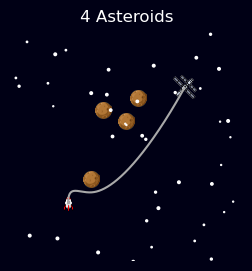

In [53]:
#set initial conditions and asteroid details
t0 = 0
tf = 1
W = 100000
r = (.007,.007)
c1 = (.2,.2)
c2 = (.6,.9)
c3 = (.3,.8)
c4 = (.5,.7)

def ode(t, y_val): #define the ode system
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    #set the new p0 and p1
    new_p0 = obstacle_dx(x,y,W,r,c1) + obstacle_dx(x,y,W,r,c2) + obstacle_dx(x,y,W,r,c3) + obstacle_dx(x,y,W,r,c4)
    new_p1 =  obstacle_dy(x,y,W,r,c1) + obstacle_dy(x,y,W,r,c2) + obstacle_dy(x,y,W,r,c3) + obstacle_dy(x,y,W,r,c4)
    return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])

def bc(ya,yb):
# ya are the initial values
# yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linspaces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)

#set the asteroids
Z1 = obstacle(X,Y,W,r,c1)
Z2 = obstacle(X,Y,W,r,c2) 
Z3 = obstacle(X,Y,W,r,c3)
Z4 = obstacle(X,Y,W,r,c4)

#set the initial guess
y0 = np.ones((8,t_steps))*3

# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3,3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
c = [.2,.2]
r = .07
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])
c = [.6,.9]
r = .07
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])
c = [.3,.8]
r = .07
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])
c = [.5,.7]
r = .07
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])

#plot the space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the dimensions for the rocket
ROCKET_SIZE = .14
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# Plot initial position of the rocket
ax.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

ax.plot(sol.y[0], sol.y[1],'darkgray')
ax.axis('off')
title_obj = plt.title('4 Asteroids')
plt.setp(title_obj, color='w')
plt.show()


This finds the solution to the boundary problem.

In [ ]:
plt.ioff()

#get data
path_length=len(sol.y[1])
tail_length=50
ts = range(path_length+50)
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3, 3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#get path
path=np.vstack((sol.y[0], sol.y[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)

#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)
# ax.legend(prop={'family': 'Arial'})

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
c = [.2,.2]
r = .07
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])
c = [.6,.9]
r = .07
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])
c = [.3,.8]
r = .07
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])
c = [.5,.7]
r = .07
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])

#plot the space stations
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set dimensions for the rocket
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# plot the trajectory
line, = plt.gca().plot([], [], "--", linewidth=3,)

# Plot initial position of the rocket
rocket = plt.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

def update(t):
    if t<tail_length:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-tail_length
    else:
        s=t-tail_length
        p=t

    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    
    #update rocket
    rocket.set_data(rotate_rocket(sol.y[2][t],sol.y[3][t]))
    rocket.set_extent([sol.y[0][t] - ROCKET_SIZE, sol.y[0][t] + ROCKET_SIZE, sol.y[1][t] - ROCKET_SIZE, sol.y[1][t] + ROCKET_SIZE])

#save and show
ani = FuncAnimation(fig, update, frames=ts[:1050][::10], interval=20)
ani.save('rocket_4asteroids.mp4')

This case added a fourth asteroid and placed them in slightly different locations. Like the three asteroid example, the rocket slows down considerably, taking great care to not hit the first asteroid. Once that obstacle is cleared, it speeds up before stopping at the space station.

<video src="rocket_4asteroids.mp4" controls>

### Model 5

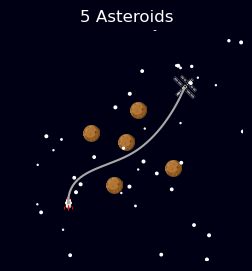

In [54]:
#set the initial conditions
t0 = 0
tf = 1
W = 10000
r = (.007,.007)
c1 = (.4,.15)
c2 = (.6,.8)
c3 = (.9,.3)
c4 = (.5,.52)
c5 = (.2,.6)

def ode(t, y_val): #define the ode system
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    #find the new p0 and p1
    new_p0 = obstacle_dx(x,y,W,r,c4) + obstacle_dx(x,y,W,r,c2) + obstacle_dx(x,y,W,r,c3) + obstacle_dx(x,y,W,r,c1) + obstacle_dx(x,y,W,r,c5)
    new_p1 =  obstacle_dy(x,y,W,r,c4) + obstacle_dy(x,y,W,r,c2) + obstacle_dy(x,y,W,r,c3) + obstacle_dy(x,y,W,r,c1) + obstacle_dy(x,y,W,r,c5)
    return np.array([xp, yp, p2, p3, new_p0, new_p1, -p0, -p1])

def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linspaces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)

#get all the asteroids
Z1 = obstacle(X,Y,W,r,c1) 
Z2 = obstacle(X,Y,W,r,c2) 
Z3 = obstacle(X,Y,W,r,c3)
Z4 = obstacle(X,Y,W,r,c4)
Z5 = obstacle(X,Y,W,r,c5)

#set initial guess
y0 = np.ones((8,t_steps))*3

# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3,3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
r = .07
ax.imshow(asteroid1, extent=[c1[0]-r, c1[0]+r, c1[1]-r, c1[1]+r])
ax.imshow(asteroid1, extent=[c2[0]-r, c2[0]+r, c2[1]-r, c2[1]+r])
ax.imshow(asteroid1, extent=[c3[0]-r, c3[0]+r, c3[1]-r, c3[1]+r])
ax.imshow(asteroid1, extent=[c4[0]-r, c4[0]+r, c4[1]-r, c4[1]+r])
ax.imshow(asteroid1, extent=[c5[0]-r, c5[0]+r, c5[1]-r, c5[1]+r])

#plot the space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the dimensions for the rocket
ROCKET_SIZE = .14
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# Plot initial position of the rocket
ax.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

ax.plot(sol.y[0], sol.y[1],'darkgray')
ax.axis('off')
title_obj = plt.title('5 Asteroids')
plt.setp(title_obj, color='w')
plt.show()

This finds the solution to the boundary problem.

In [14]:
mypath = sol.y
plt.ioff()
#get data
path_length=len(mypath[1])
tail_length=50
ts = range(path_length+50)
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3, 3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#get path
path=np.vstack((mypath[0], mypath[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)

#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
r = .07
ax.imshow(asteroid1, extent=[c1[0]-r, c1[0]+r, c1[1]-r, c1[1]+r])
ax.imshow(asteroid1, extent=[c2[0]-r, c2[0]+r, c2[1]-r, c2[1]+r])
ax.imshow(asteroid1, extent=[c3[0]-r, c3[0]+r, c3[1]-r, c3[1]+r])
ax.imshow(asteroid1, extent=[c4[0]-r, c4[0]+r, c4[1]-r, c4[1]+r])
ax.imshow(asteroid1, extent=[c5[0]-r, c5[0]+r, c5[1]-r, c5[1]+r])

#show space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set dimesnios for the rocket
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# plot the trajectory
line, = plt.gca().plot([], [], "--", linewidth=3,)

# Plot initial position of the rocket
rocket = plt.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

def update(t):
    if t<tail_length:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-tail_length
    else:
        s=t-tail_length
        p=t

    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])

    #update rocket
    rocket.set_data(rotate_rocket(sol.y[2][t],sol.y[3][t]))
    rocket.set_extent([sol.y[0][t] - ROCKET_SIZE, sol.y[0][t] + ROCKET_SIZE, sol.y[1][t] - ROCKET_SIZE, sol.y[1][t] + ROCKET_SIZE])

#save and show
ani = FuncAnimation(fig, update, frames=ts[:1020][::10], interval=10)
ani.save('rocket_5asteroids.mp4')

Adding a fifth asteroid gave us an interesting optimal path. Rather than taking a wide arc around the asteroid field, we see the rocket carefully weaves between asteroids. Since most of the control is focused on not hitting the asteroids, we see it moves relatively slowly as it maneuvers around the obstacles.

<video src="rocket_5asteroids.mp4" controls>

We now examine the same model with poorly chosen weights.

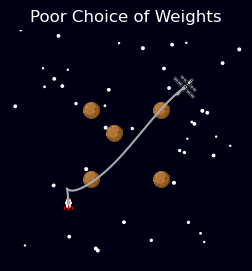

In [55]:
# set initial conditions
t0 = 0
tf = 1
W = 550
r = (.007,.007)
c1 = (.2,.8)
c2 = (.2,.2)
c3 = (.8,.8)
c4 = (.8,.2)
c5 = (.4,.6)

def ode(t, y_val): #define the ode system
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    #find the new p0 and p1
    new_p0 = obstacle_dx(x,y,W,r,c4) + obstacle_dx(x,y,W,r,c2) + obstacle_dx(x,y,W,r,c3) + obstacle_dx(x,y,W,r,c1) + obstacle_dx(x,y,W,r,c5)
    new_p1 =  obstacle_dy(x,y,W,r,c4) + obstacle_dy(x,y,W,r,c2) + obstacle_dy(x,y,W,r,c3) + obstacle_dy(x,y,W,r,c1) + obstacle_dy(x,y,W,r,c5)
    return np.array([xp, yp, p2, p3, new_p0, new_p1, -p0, -p1])

def bc(ya,yb):
# ya are the initial values
# yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linspaces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)

#find the obstacles
Z1 = obstacle(X,Y,W,r,c1) 
Z2 = obstacle(X,Y,W,r,c2) 
Z3 = obstacle(X,Y,W,r,c3)
Z4 = obstacle(X,Y,W,r,c4)
Z5 = obstacle(X,Y,W,r,c5)

#set the initial guess
y0 = np.ones((8,t_steps))*1

# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3,3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
r = .07
ax.imshow(asteroid1, extent=[c1[0]-r, c1[0]+r, c1[1]-r, c1[1]+r])
ax.imshow(asteroid1, extent=[c2[0]-r, c2[0]+r, c2[1]-r, c2[1]+r])
ax.imshow(asteroid1, extent=[c3[0]-r, c3[0]+r, c3[1]-r, c3[1]+r])
ax.imshow(asteroid1, extent=[c4[0]-r, c4[0]+r, c4[1]-r, c4[1]+r])
ax.imshow(asteroid1, extent=[c5[0]-r, c5[0]+r, c5[1]-r, c5[1]+r])

#plot the space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the dimensions for the rocket
ROCKET_SIZE = .14
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# Plot initial position of the rocket
ax.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

ax.plot(sol.y[0], sol.y[1],'darkgray')
ax.axis('off')
title_obj = plt.title('Poor Choice of Weights')
plt.setp(title_obj, color='w')
plt.show()

This finds the solution to the boundary value problem.

In this case, we see the optimal path prioritizes minimizing gas consumption over avoiding the asteroids. The result is a path that goes straight through the middle of two asteroid (a path that is not recommended outside of simulation).

In [ ]:
mypath = sol.y
plt.ioff()

#get data
path_length=len(mypath[1])
tail_length=len(mypath[1]-1)
ts = range(path_length+50)
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3, 3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#get path
path=np.vstack((mypath[0], mypath[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)

#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
r = .07
ax.imshow(asteroid1, extent=[c1[0]-r, c1[0]+r, c1[1]-r, c1[1]+r])
ax.imshow(asteroid1, extent=[c2[0]-r, c2[0]+r, c2[1]-r, c2[1]+r])
ax.imshow(asteroid1, extent=[c3[0]-r, c3[0]+r, c3[1]-r, c3[1]+r])
ax.imshow(asteroid1, extent=[c4[0]-r, c4[0]+r, c4[1]-r, c4[1]+r])
ax.imshow(asteroid1, extent=[c5[0]-r, c5[0]+r, c5[1]-r, c5[1]+r])

#set space station
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set title
ax.set_title("Example of Poor Choice of Weights")
ax.set_facecolor('#000015')

#set the dimesions of the spaceship
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# plot the trajectory
line, = plt.gca().plot([], [], "--", linewidth=3,)

# Plot initial position of the rocket
rocket = plt.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)
ax.set_facecolor('#000015')
def update(t):
    if t<tail_length:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-tail_length
    else:
        s=t-tail_length
        p=t

    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    
    #update rocket
    rocket.set_data(rotate_rocket(sol.y[2][t],sol.y[3][t]))
    rocket.set_extent([sol.y[0][t] - ROCKET_SIZE, sol.y[0][t] + ROCKET_SIZE, sol.y[1][t] - ROCKET_SIZE, sol.y[1][t] + ROCKET_SIZE])
    
#save and show
ani = FuncAnimation(fig, update, frames=ts[:19000][::100], interval=10)
ani.save('worst_example.mp4')

This compiles the animation.

<video src="worst_example.mp4" controls>

### Model 6

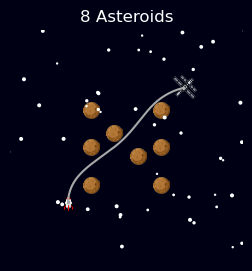

In [56]:
#set initial conditions
t0 = 0
tf = 1
W = 10000
r = (.005,.005)
c1 = (.2,.8)
c2 = (.2,.15)
c3 = (.8,.8)
c4 = (.8,.15)
c5 = (.4,.6)
c6 = (.6,.4)
c7 = (.2,.475)
c8 = (.8,.475)

def ode(t, y_val): #define the ode system
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    #set the new p0 and p1
    new_p0 = obstacle_dx(x,y,W,r,c4) + obstacle_dx(x,y,W,r,c2) + obstacle_dx(x,y,W,r,c3) + obstacle_dx(x,y,W,r,c1) + obstacle_dx(x,y,W,r,c5)+obstacle_dx(x,y,W,r,c6)
    new_p1 =  obstacle_dy(x,y,W,r,c4) + obstacle_dy(x,y,W,r,c2) + obstacle_dy(x,y,W,r,c3) + obstacle_dy(x,y,W,r,c1) + obstacle_dy(x,y,W,r,c5)+obstacle_dy(x,y,W,r,c6)
    return np.array([xp, yp, p2, p3, new_p0, new_p1, -p0, -p1])

def bc(ya,yb):
# ya are the initial values
# yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linspaces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)

# set all the asteroids
Z1 = obstacle(X,Y,W,r,c1) 
Z2 = obstacle(X,Y,W,r,c2) 
Z3 = obstacle(X,Y,W,r,c3)
Z4 = obstacle(X,Y,W,r,c4)
Z5 = obstacle(X,Y,W,r,c5)
Z6 = obstacle(X,Y,W,r,c6)
Z7 = obstacle(X,Y,W,r,c7)
Z8 = obstacle(X,Y,W,r,c8)

#set the initial guess
y0 = np.ones((8,t_steps))*1

# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3,3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
r = .07
ax.imshow(asteroid1, extent=[c1[0]-r, c1[0]+r, c1[1]-r, c1[1]+r])
ax.imshow(asteroid1, extent=[c2[0]-r, c2[0]+r, c2[1]-r, c2[1]+r])
ax.imshow(asteroid1, extent=[c3[0]-r, c3[0]+r, c3[1]-r, c3[1]+r])
ax.imshow(asteroid1, extent=[c4[0]-r, c4[0]+r, c4[1]-r, c4[1]+r])
ax.imshow(asteroid1, extent=[c5[0]-r, c5[0]+r, c5[1]-r, c5[1]+r])
ax.imshow(asteroid1, extent=[c6[0]-r, c6[0]+r, c6[1]-r, c6[1]+r])
ax.imshow(asteroid1, extent=[c7[0]-r, c7[0]+r, c7[1]-r, c7[1]+r])
ax.imshow(asteroid1, extent=[c8[0]-r, c8[0]+r, c8[1]-r, c8[1]+r])

#plot the space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the dimensions for the rocket
ROCKET_SIZE = .14
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# Plot initial position of the rocket
ax.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

ax.plot(sol.y[0], sol.y[1],'darkgray')
ax.axis('off')
title_obj = plt.title('8 Asteroids')
plt.setp(title_obj, color='w')
plt.show()

This finds the solution to the boundary problem.

In [16]:
mypath = sol.y
plt.ioff()

#get data
path_length=len(mypath[1])
tail_length=50
ts = range(path_length+50)
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3, 3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#get path
path=np.vstack((mypath[0], mypath[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)

#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)
# ax.legend(prop={'family': 'Arial'})

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
r = .07
ax.imshow(asteroid1, extent=[c1[0]-r, c1[0]+r, c1[1]-r, c1[1]+r])
ax.imshow(asteroid1, extent=[c2[0]-r, c2[0]+r, c2[1]-r, c2[1]+r])
ax.imshow(asteroid1, extent=[c3[0]-r, c3[0]+r, c3[1]-r, c3[1]+r])
ax.imshow(asteroid1, extent=[c4[0]-r, c4[0]+r, c4[1]-r, c4[1]+r])
ax.imshow(asteroid1, extent=[c5[0]-r, c5[0]+r, c5[1]-r, c5[1]+r])
ax.imshow(asteroid1, extent=[c6[0]-r, c6[0]+r, c6[1]-r, c6[1]+r])
ax.imshow(asteroid1, extent=[c7[0]-r, c7[0]+r, c7[1]-r, c7[1]+r])
ax.imshow(asteroid1, extent=[c8[0]-r, c8[0]+r, c8[1]-r, c8[1]+r])

#set space station
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set dimensions of the rocket
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# plot the trajectory
line, = plt.gca().plot([], [], "--", linewidth=3,)

# Plot initial position of the rocket
rocket = plt.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

def update(t):
    if t<tail_length:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-tail_length
    else:
        s=t-tail_length
        p=t
    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    #update rocket
    rocket.set_data(rotate_rocket(sol.y[2][t],sol.y[3][t]))
    rocket.set_extent([sol.y[0][t] - ROCKET_SIZE, sol.y[0][t] + ROCKET_SIZE, sol.y[1][t] - ROCKET_SIZE, sol.y[1][t] + ROCKET_SIZE])

#save and show
ani = FuncAnimation(fig, update, frames=ts[:1320][::10], interval=10)
ani.save('many_asteroids.mp4')

Our next case extends the five asteroid example by creating a very narrow path through the obstalces. With eight asteroids, the rocket carefully navigates through a successful path. It is successful in doing so and then returns to the space station. 

<video src="many_asteroids.mp4" controls>

### Model 8

We will now showcase a model with a moving asteroid.

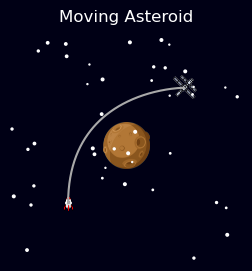

In [57]:
#initialize everything
t0 = 0
tf = 1
W = 10
r = (.005,.005)

def ode(t, y_val): #define the ode system
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    #set the new p0 and p1
    new_p0 = new_obstacle_dx(x,y,t,-.01,-.01,W,r)
    new_p1 =  new_obstacle_dy(x,y,t,-.01,-.01,W,r)
    return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])

def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-3,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linspaces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)

#find the asteroid
Z = obstacle(X,Y,W,r) 

#set the initial guess
y0 = np.ones((8,t_steps))*3

# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3,3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
c = [1/2,1/2]
r = .2
ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r])

#plot the space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the dimensions for the rocket
ROCKET_SIZE = .14
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# Plot initial position of the rocket
ax.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)

ax.plot(sol.y[0], sol.y[1],'darkgray')
ax.axis('off')
title_obj = plt.title('Moving Asteroid')
plt.setp(title_obj, color='w')
plt.show()


This finds the solution to the boundary problem.

In [49]:
plt.ioff()

#get data
path_length=len(sol.y[1])
ts = range(path_length+50)
fig = plt.figure()
fig.set_facecolor('#000015')
fig.set_size_inches(3,3)
ax = fig.add_subplot(111)

#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')

path=np.vstack((sol.y[0], sol.y[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)

#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)

#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')

#asteroid dots
asteroid1 = mpimg.imread("meteoroid.png")
asteroid, = ax.plot([], [], color="#5FC2D9", label='asteroid', marker='^', markersize=15)
c = [1/2,1/2]
r = .2

#plot the space stations
space_station = mpimg.imread("space-station.png")
ax.imshow(space_station, extent=[.9,1.1,.9,1.1])

#set the dimensions for the rocket
xmin, xmax = sol.y[0][0]-ROCKET_SIZE, sol.y[0][0]+ROCKET_SIZE
ymin, ymax = sol.y[1][0]-ROCKET_SIZE, sol.y[1][0]+ROCKET_SIZE
img = mpimg.imread(filepath)

# plot the trajectory
line, = plt.gca().plot([], [], "--", linewidth=3,)

# Plot initial position of the rocket
rocket = plt.imshow(img, extent=[xmin,xmax,ymin,ymax], aspect='auto', zorder=2)
asteroid = ax.imshow(asteroid1, extent=[c[0]-r, c[0]+r, c[1]-r, c[1]+r],aspect='auto', zorder=2)
W = 10
r = (.005,.005)

def update(t):
    if t<50:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-50
    else:
        s=t-50
        p=t

    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    
    #update rocket
    rocket.set_data(rotate_rocket(sol.y[2][t],sol.y[3][t]))
    rocket.set_extent([sol.y[0][t] - ROCKET_SIZE, sol.y[0][t] + ROCKET_SIZE, sol.y[1][t] - ROCKET_SIZE, sol.y[1][t] + ROCKET_SIZE])
    x,y = sol.y[0][t], sol.y[1][t]
    newx,newy = new_obstaclexy(x,y,t,-.01,-.01,W,r)
    asteroid.set_extent([newx - ROCKET_SIZE, newx + ROCKET_SIZE, newy - ROCKET_SIZE, newy + ROCKET_SIZE])
    
#save and show
ani = FuncAnimation(fig, update, frames=ts[:200][::2], interval=20)
ani.save('rocketmoving.mp4')

Here we allow the asteroid to be in motion. We set up the problem in a similar way, but allowed the center of the asteroid to change at each time step. This was slightly more difficult to animate, but our control was still successful in avoiding the obstacle. 

<video src="rocketmoving.mp4" controls>

# 3D Model

We were able to increase the dimensionality of our model, to include position, velocity and a control acceleration in a third dimension.

In [12]:
def obstacle3d(x,y,z, W=1,r=(.2,.2,.2),c=(.5,.5,.5)):
    '''
    Define an area that will represent an asteroid
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        z (float): y position in space
        W (float): weight of asteroid
        r (tuple): radius in x,y and z direction
        c (tuple): center of the ellipsoid
    '''
    
    ellipsoid = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1] + (z - c[2])**2/r[2])**20 + 1
    return W / ellipsoid

def obstacle_dx_3d(x,y,z, W=1,r=(1/5,1/5,1/5),c=(1/2,1/2,1/2)):
    '''
    x derivative of the asteroid

    Parameters:
        x (float): x position in space
        y (float): y position in space
        z (float): y position in space
        W (float): weight of asteroid
        r (tuple): radius in x,y and z direction
        c (tuple): center of the ellipsoid
    '''
    sphere = (x - c[0])**2/r[0] + (y - c[1])**2/r[1] + (z - c[2])**2/r[2]
    numer = -40*W*(sphere)**19 * (x-c[0])
    denom = r[0]*((sphere)**20 + 1)**2
    return numer / denom

def obstacle_dy_3d(x,y,z,W=1,r=(.2,.2,.2),c=(.5,.5,.5)):
    '''
    y derivative of the asteroid

    Parameters:
        x (float): x position in space
        y (float): y position in space
        z (float): y position in space
        W (float): weight of asteroid
        r (tuple): radius in x,y and z direction
        c (tuple): center of the ellipsoid
    '''
    sphere = (x - c[0])**2/r[0] + (y - c[1])**2/r[1] + (z - c[2])**2/r[2]
    numer = -40*W*(sphere)**19 * (y-c[1])
    denom = r[1]*((sphere)**20 + 1)**2
    return numer / denom

def obstacle_dz_3d(x,y,z,W = 1, r= (1/5,1/5,1/5), c = (1/2,1/2,1/2)):
    '''
    z derivative of the asteroid

    Parameters:
        x (float): x position in space
        y (float): y position in space
        z (float): y position in space
        W (float): weight of asteroid
        r (tuple): radius in x, y and z direction
        c (tuple): center of the ellipsoid
    '''
    sphere = (x - c[0])**2/r[0] + (y - c[1])**2/r[1] + (z - c[2])**2/r[2]
    numer = -40*W*(sphere)**19 * (z-c[2])
    denom = r[2]*((sphere)**20 + 1)**2
    
    return numer/denom

The above code defines the obstacle for our new model.

In [13]:
def rocket_trajectory(t, y_val):
    """Define the path of the rocket using the evolution equations 
    for the state x and costate p"""
    
    x,y,z,xp,yp,zp,p0,p1,p2,p3,p4,p5 = y_val
    
    #define the costate equations for p3,p4 and p5
    new_p0 = obstacle_dx_3d(x,y,z,W)
    new_p1 =  obstacle_dy_3d(x,y,z,W)
    new_p2 = obstacle_dx_3d(x,y,z,W)
    
    #return the updated state at time t
    return np.array([xp, yp, zp, p3, p4,p5, new_p0,new_p1,new_p2, -p0, -p1,-p2])

The above code is used to find the trajectory of the rocket.

In [14]:
def bc_3d(ya,yb):
    """Define the boundary conditions of the rocket with a fixed intial time"""
    return np.array([ya[0],ya[1],ya[2],ya[3],ya[4]-3,ya[5]-3,yb[0]-1,yb[1]-1,yb[2]-1,yb[3],yb[4],yb[5]])

The above code defines the boundary conditions.

We will now solve for the optimal path and show different views of what that path looks like.

In [15]:
#set initial and final time
t0 = 0
tf = 1

#define the weight of the asteroid
W = 150

#set the number of time steps
t_steps = 100
t = np.linspace(t0,tf,t_steps)

#create a grid for position in the x,y and z direction
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
z = np.linspace(0,1,t_steps)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

#find the values of the obstacle
values = obstacle3d(X, Y, Z)
#create a mask to define the boundary of the obstacle
mask = values > 0.9 * np.max(values)

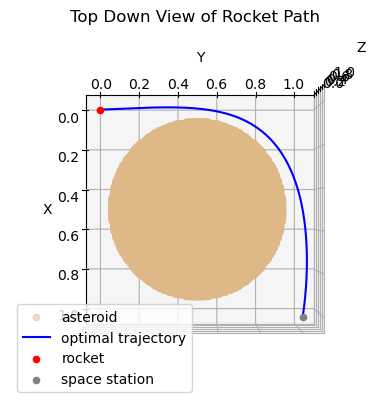

In [16]:
#create a 3d Figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plot the points of the asteroid
ax.scatter(X[mask],Y[mask],Z[mask], c = 'burlywood', alpha=0.5, label = 'asteroid')

#define your initial guess
y0 = np.ones((12,t_steps))*3

# Solve the system.
sol = solve_bvp(rocket_trajectory,bc_3d, t, y0, max_nodes=30000)

#plot the optimal trajectory of the rocket
ax.plot(sol.y[0],sol.y[1],sol.y[2], color = 'blue', label = 'optimal trajectory')
ax.scatter(0,0,0,color = 'red', label = 'rocket')
ax.scatter(1,1,1, color = 'gray', label = 'space station')

#look straight down at the asteroid
ax.view_init(elev=90, azim=0) 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Top Down View of Rocket Path')
plt.legend()
plt.show()

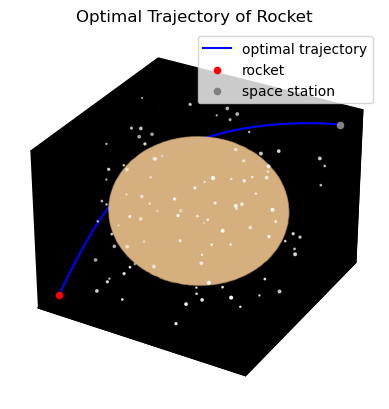

In [17]:
#Create a 3d object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#set the background to be black with RBG values
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))  
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))  
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)) 

#plot the points of the asteroid
ax.scatter(X[mask],Y[mask],Z[mask], c = 'burlywood', alpha=0.1)


#define the initial guess and solve the system
y0 = np.ones((12,t_steps))*3
sol = solve_bvp(rocket_trajectory, bc_3d, t, y0, max_nodes=30000)

#plot the optimal trajectory of the rocket
ax.plot(sol.y[0],sol.y[1],sol.y[2], color = 'blue', label = 'optimal trajectory')
ax.scatter(0,0,0,color = 'red', label = 'rocket')
ax.scatter(1,1,1, color = 'gray', label = 'space station')

#create objects simulating stars
starx=np.random.uniform(0,1,size=100)
stary=np.random.uniform(0,1,size= 100)
starz=np.random.uniform(0,1,size=100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)

#scatter the stars
ax.scatter(starx, stary,starz, s=sizes, color='white')

#remove tick marks
ax.set_xticks([])
ax.set_yticks([]) 
ax.set_zticks([])

ax.set_title('Optimal Trajectory of Rocket')
plt.legend()
plt.show()

Due to time constraints, we were not able to include an animation of our 3d rocket trajectory

# Results/Analysis

While doing this project we noticed some interesting things that are worth noting. First, when the weights for asteroids are high enough, our model reliable finds the 2-dimensional optimal path to the spaceship in the given amount of time while avoiding asteroids, both moving and stationary. This suggests our model was set up and implemented correctly. We also noticed that the rocket tends to slow down dramatically when it is near an asteroid. This is likely because the cost of being close to the asteroid is incredibly high, leading the model to drop acceleration dramatically to being the overall cost down. Also, in the real world this would increase control when near asteroids. When it moves away from the asteroids, it accelerates quickly and maintains what appears to be a constant velocity to avoid further acceleration and keep the cost down. This model successfully found an optimal path that accomplished avoiding obstacles, arriving at a desired destination, and minimizing the fuel consumption.

# Ethical Considerations

This project doesn't seem to come with an abundance of issues, but there are a few things that should be considered. First, this model is by no means in a state to be applied to the real world at this time. As mentioned previously, there are vast simplifications in this model to better fit our understanding. The choice of weights can determine the success of the path and could put a real spacheship and its passengers into danger if put into practice. In addition, there is no limit set on how quickly the rocket can accelerate. This could cause serious harm to any passngers given the aggressive turns and high acceleration that is possible. It is also possible that the high acceleration is not even possible. It is important to consider and mitigate these risks before implementing this model into the real world.

# Conclusion

Overall, we have learned a great deal about optimal control through this project. We gained a deeper understanding of how to set up such a problem and adjust it to account for new situations. There are a variety of ways to complicate this model and make it more realistic in future work. First, more robust application to the 3-dimensional world would be a good place to start. One could also make adjustments to the cost functional in order to account for a variety of things, such as limiting velocity of the spaceship, accounting for gravity, and accounting for the weight of the rocket and how that changes with fuel consumption.

# References

[1] Johnston, Hunter. ‘The Theory of Functional Connections: A Journey from Theory to Application’. arXiv [Math.OC], 2021, http://arxiv.org/abs/2105.08034. ArXiv.


[2] Foundations-of-Applied-Mathematics, et al. “Foundations-of-Applied-Mathematics/Labs: Labs for the Foundations of Applied Mathematics Curriculum.” GitHub, SIAM, github.com/Foundations-of-Applied-Mathematics/Labs. Accessed 8 Apr. 2024. 


[3] Hansen, Jeff